# Clustering animals with attributes

## 1. Load in the data set

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans

In [7]:
#
# Load in animal names
#
f = open('Animals_with_Attributes/classes.txt')
lines = f.readlines()
names = []
for line in lines:
    (key,val) = line.split()
    names.append(val)
f.close()
#
# Load attribute matrix
#
x = np.loadtxt('Animals_with_Attributes/predicate-matrix-continuous.txt')

## 2. K-means clustering

In [8]:
#
# Run Lloyd's algorithm
#
k = 15 # number of clusters
kmeans = KMeans(n_clusters=k, init='random')
kmeans.fit(x)
#
# Get a list of the animals in each cluster
#
clusters = []
for j in range(0,k):
    clusters.append([])
for i in range(0,50):
    clusters[kmeans.labels_[i]].append(names[i])
#
# Print out clusters
#
for j in range(0,k):
    print (j+1, clusters[j])

1 ['tiger', 'leopard', 'fox', 'wolf', 'bobcat', 'lion']
2 ['skunk', 'mouse']
3 ['squirrel']
4 ['persian+cat', 'siamese+cat', 'chihuahua']
5 ['spider+monkey', 'gorilla', 'chimpanzee']
6 ['moose', 'ox', 'buffalo', 'pig']
7 ['zebra']
8 ['killer+whale', 'beaver', 'blue+whale', 'humpback+whale', 'seal', 'otter', 'walrus', 'dolphin']
9 ['mole', 'hamster', 'rabbit']
10 ['hippopotamus', 'elephant', 'rhinoceros']
11 ['antelope', 'horse', 'giraffe', 'deer']
12 ['dalmatian', 'german+shepherd', 'collie']
13 ['sheep', 'giant+panda', 'cow']
14 ['grizzly+bear', 'polar+bear']
15 ['bat', 'rat', 'weasel', 'raccoon']


## 3. Hierarchical clustering

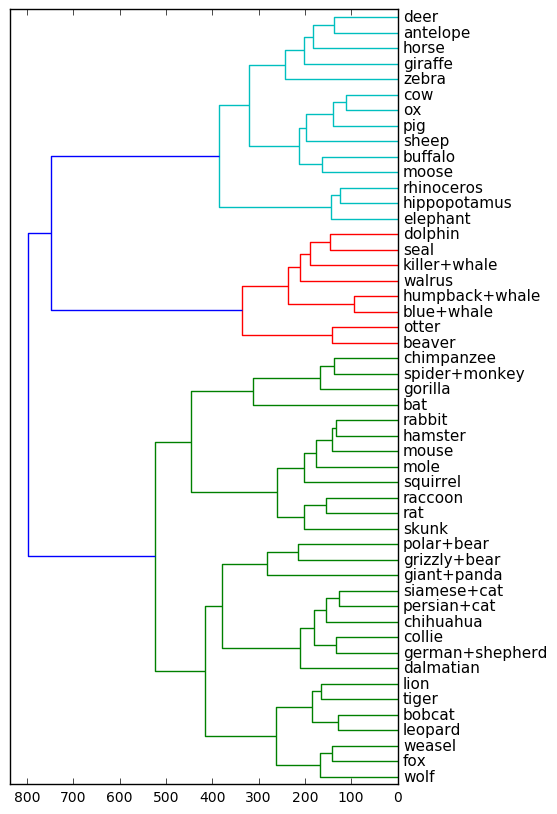

In [9]:
#
# Adjust figure size to accommodate the full tree
#
from pylab import rcParams
rcParams['figure.figsize'] = 5, 10
#
# Do hierarchical clustering using Ward's method
#
z = sch.linkage(x, method='ward')
#
# Display dendrogram
#
info = sch.dendrogram(z, orientation='left', labels=names, leaf_font_size=11)

# Principal component analysis on MNIST

## 1. Load MNIST data

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import gzip, sys, os
from urllib.request import urlretrieve

In [4]:
def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urlretrieve(source + filename, filename)

def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    # Read the inputs in Yann LeCun's binary format.
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1,784)
    return data / np.float32(256)

In [5]:
train_data = load_mnist_images('train-images-idx3-ubyte.gz')

## 2. Statistics of the data

In [6]:
# Compute covariance matrix
Sigma = np.cov(train_data, rowvar=0, bias=1)
# Compute coordinate-wise variances, in increasing order
coordinate_variances = np.sort(Sigma.diagonal())
# Compute variances in eigenvector directions, in increasing order
eigenvector_variances = np.sort(np.linalg.eigvalsh(Sigma))

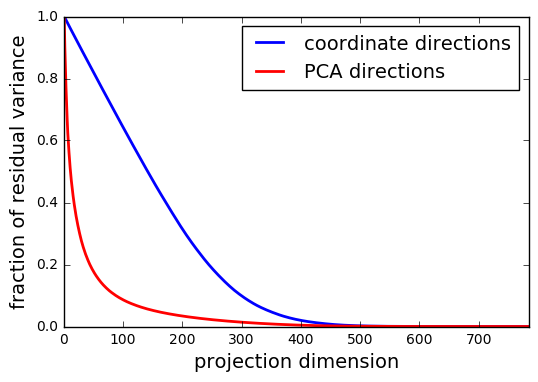

In [7]:
# Compute fraction of overall variance lost when projecting to k coordinate directions
total_coordinate_variance = np.cumsum(coordinate_variances)
total_coordinate_variance = total_coordinate_variance/total_coordinate_variance[783]
# Compute fraction of overall variance lost when projecting to k eigenvector directions
total_eigenvector_variance = np.cumsum(eigenvector_variances)
total_eigenvector_variance = total_eigenvector_variance/total_eigenvector_variance[783]
# Plot these results
plt.plot(np.arange(1,784), total_coordinate_variance[784:0:-1], 'b-', lw=2)
plt.plot(np.arange(1,784), total_eigenvector_variance[784:0:-1], 'r-', lw=2)
plt.xlabel('projection dimension', fontsize=14)
plt.ylabel('fraction of residual variance', fontsize=14)
plt.xlim(0,784)
plt.ylim(0.0,1.0)
plt.legend(['coordinate directions', 'PCA directions'], fontsize=14)
plt.show()

## 3. Projection and reconstruction

In [10]:
eigenvalues, eigenvectors = np.linalg.eigh(Sigma)

In [15]:
eigenvectors.shape

(784, 784)

In [18]:
# Function that returns the project-and-reconstruct operations as a single matrix
def projection_and_reconstruction(k):
    U = eigenvectors[:,(784-k):784]
    P = np.dot(U,U.T)
    return P

In [9]:
def show_digit(x):
    # Make sure all entries of x are in the range [0,255]
    for i in range(784):
        x[i] = max(0.0, x[i])
        x[i] = min(255.0, x[i])
    # Now display
    plt.axis('off')
    plt.imshow(x.reshape((28,28)), cmap=plt.cm.gray)
    plt.show()
    return

In [19]:
def show_effect_of_PCA(x, k_list):
    print ("Original:")
    show_digit(x)
    for k in k_list:
        if (k > 0) and (k < 784):
            print ("Projection to dimension ", k)
            P = projection_and_reconstruction(k)
            show_digit(P.dot(x))

Original:


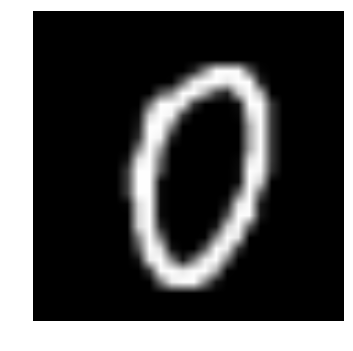

Projection to dimension  100


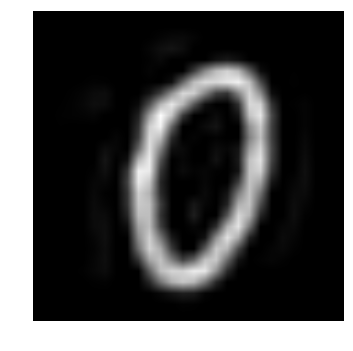

Projection to dimension  50


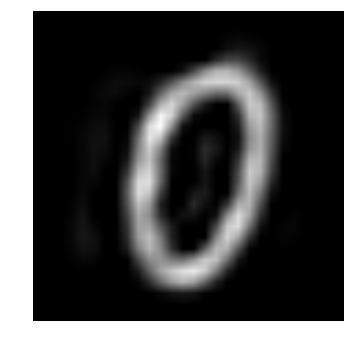

Projection to dimension  25


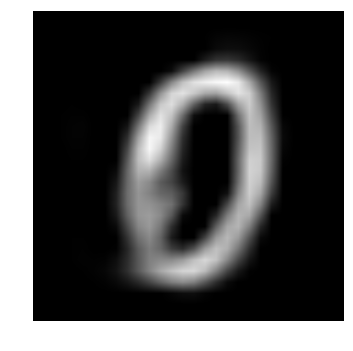

Projection to dimension  10


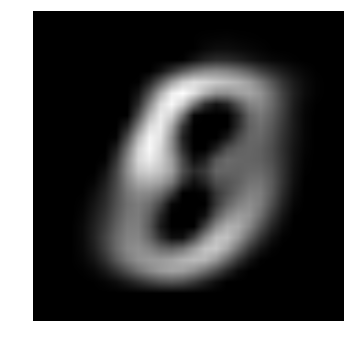

In [20]:
index = 1000
show_effect_of_PCA(train_data[index,], [100, 50, 25, 10])